In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('insurance.csv')

display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.isnull().values.any() # check for any null values

False

In [4]:
duplicateRows = df[df.duplicated()]
print(duplicateRows)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [5]:
df = df.drop_duplicates().reset_index()
display(df)

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830
1333,1334,18,female,31.920,0,no,northeast,2205.98080
1334,1335,18,female,36.850,0,no,southeast,1629.83350
1335,1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
#first 5 observations
display(df.head())
#last 5 observations
display(df.info())
#Summary statistics of features
display(df.describe())

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1337 non-null   int64  
 1   age       1337 non-null   int64  
 2   sex       1337 non-null   object 
 3   bmi       1337 non-null   float64
 4   children  1337 non-null   int64  
 5   smoker    1337 non-null   object 
 6   region    1337 non-null   object 
 7   charges   1337 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.7+ KB


None

,index,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,668.565445,39.222139,30.663452,1.095737,13279.121487
std,386.528803,14.044333,6.100468,1.205571,12110.359656
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.000000,27.000000,26.290000,0.000000,4746.344000
50%,669.000000,39.000000,30.400000,1.000000,9386.161300
75%,1003.000000,51.000000,34.700000,2.000000,16657.717450
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


C:\Users\lewis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


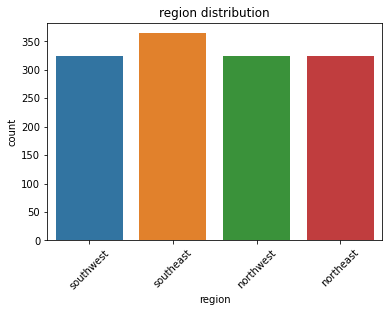

In [7]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['region'])
plt.title('region distribution')
plt.xticks(rotation = 45)
plt.show()

C:\Users\lewis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


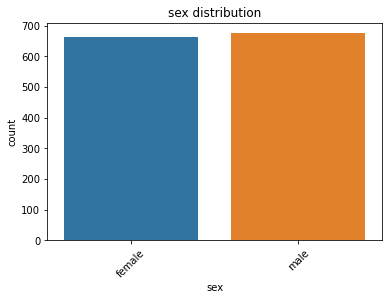

In [8]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['sex'])
plt.title('sex distribution')
plt.xticks(rotation = 45)
plt.show()

C:\Users\lewis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


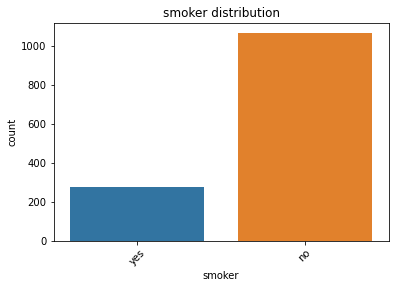

In [9]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['smoker'])
plt.title('smoker distribution')
plt.xticks(rotation = 45)
plt.show()

C:\Users\lewis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


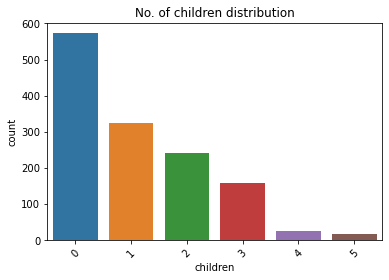

In [10]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['children'])
plt.title('No. of children distribution')
plt.xticks(rotation = 45)
plt.show()

In [11]:
def convert_categorical_to_numerical(data,unique_val=10):
    obj_df = data.select_dtypes(include=[object])  
    unique_list = [f for f in obj_df.columns if obj_df[f].unique().shape[0]>=unique_val]
    obj_df_sel = obj_df.drop(columns=unique_list)
    for col in obj_df_sel.columns:
        data[col] = pd.factorize(data[col])[0]
    print("conversion successfull")
    return data

dfnew = convert_categorical_to_numerical(data=df)


conversion successfull


In [12]:
conditions = [
    (dfnew['bmi'] < 18.5),
    (dfnew['bmi'] >= 18.5) & (dfnew['bmi']<25),
    (dfnew['bmi'] >=25) & (dfnew['bmi']<30),
    (dfnew['bmi']>=30)]
choices = [0, 1, 2, 3]
dfnew['weight_class'] = np.select(conditions, choices)
display(dfnew)

,index,age,sex,bmi,children,smoker,region,charges,weight_class
0,0,19,0,27.900,0,0,0,16884.92400,2
1,1,18,1,33.770,1,1,1,1725.55230,3
2,2,28,1,33.000,3,1,1,4449.46200,3
3,3,33,1,22.705,0,1,2,21984.47061,1
4,4,32,1,28.880,0,1,2,3866.85520,2
...,...,...,...,...,...,...,...,...,...
1332,1333,50,1,30.970,3,1,2,10600.54830,3
1333,1334,18,0,31.920,0,1,3,2205.98080,3
1334,1335,18,0,36.850,0,1,1,1629.83350,3
1335,1336,21,0,25.800,0,1,0,2007.94500,2


In [13]:
display(dfnew.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1337 non-null   int64  
 1   age           1337 non-null   int64  
 2   sex           1337 non-null   int64  
 3   bmi           1337 non-null   float64
 4   children      1337 non-null   int64  
 5   smoker        1337 non-null   int64  
 6   region        1337 non-null   int64  
 7   charges       1337 non-null   float64
 8   weight_class  1337 non-null   int32  
dtypes: float64(2), int32(1), int64(6)
memory usage: 88.9 KB


None

In [14]:
dfnew.describe()

,index,age,sex,bmi,children,smoker,region,charges,weight_class
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,668.565445,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487,2.329843
std,386.528803,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656,0.804897
min,0.000000,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,334.000000,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000,2.000000
50%,669.000000,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300,3.000000
75%,1003.000000,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450,3.000000
max,1337.000000,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,3.000000


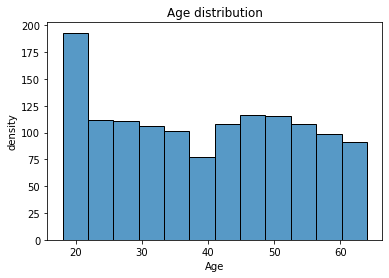

In [15]:
sns.histplot(dfnew['age'])
plt.title('Age distribution')
plt.ylabel('density')
plt.xlabel('Age')
plt.show()

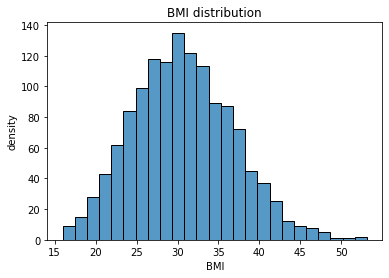

In [16]:
sns.histplot(dfnew['bmi'])
plt.title('BMI distribution')
plt.ylabel('density')
plt.xlabel('BMI')
plt.show()

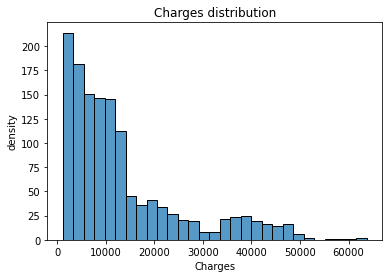

In [17]:
sns.histplot(dfnew['charges'])
plt.title('Charges distribution')
plt.ylabel('density')
plt.xlabel('Charges')
plt.show()

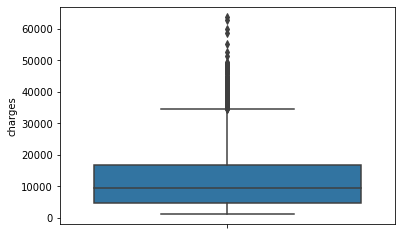

In [18]:
var_list = ['charges']

for col in var_list:
    sns.boxplot(y = col,data = dfnew)
    plt.show()

In [19]:
dfnew['log(charges)'] = np.log10(dfnew['charges'])

display(dfnew)

,index,age,sex,bmi,children,smoker,region,charges,weight_class,log(charges)
0,0,19,0,27.900,0,0,0,16884.92400,2,4.227499
1,1,18,1,33.770,1,1,1,1725.55230,3,3.236928
2,2,28,1,33.000,3,1,1,4449.46200,3,3.648308
3,3,33,1,22.705,0,1,2,21984.47061,1,4.342116
4,4,32,1,28.880,0,1,2,3866.85520,2,3.587358
...,...,...,...,...,...,...,...,...,...,...
1332,1333,50,1,30.970,3,1,2,10600.54830,3,4.025328
1333,1334,18,0,31.920,0,1,3,2205.98080,3,3.343602
1334,1335,18,0,36.850,0,1,1,1629.83350,3,3.212143
1335,1336,21,0,25.800,0,1,0,2007.94500,2,3.302752


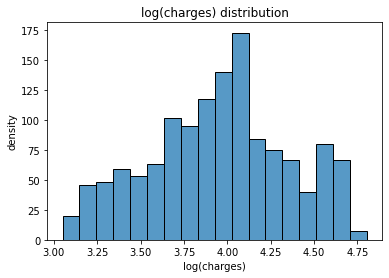

In [20]:
sns.histplot(dfnew['log(charges)'])
plt.title('log(charges) distribution')
plt.ylabel('density')
plt.xlabel('log(charges)')
plt.show()

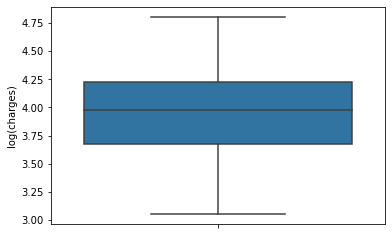

In [21]:
var_list = ['log(charges)']

for col in var_list:
    sns.boxplot(y = col,data = dfnew)
    plt.show()

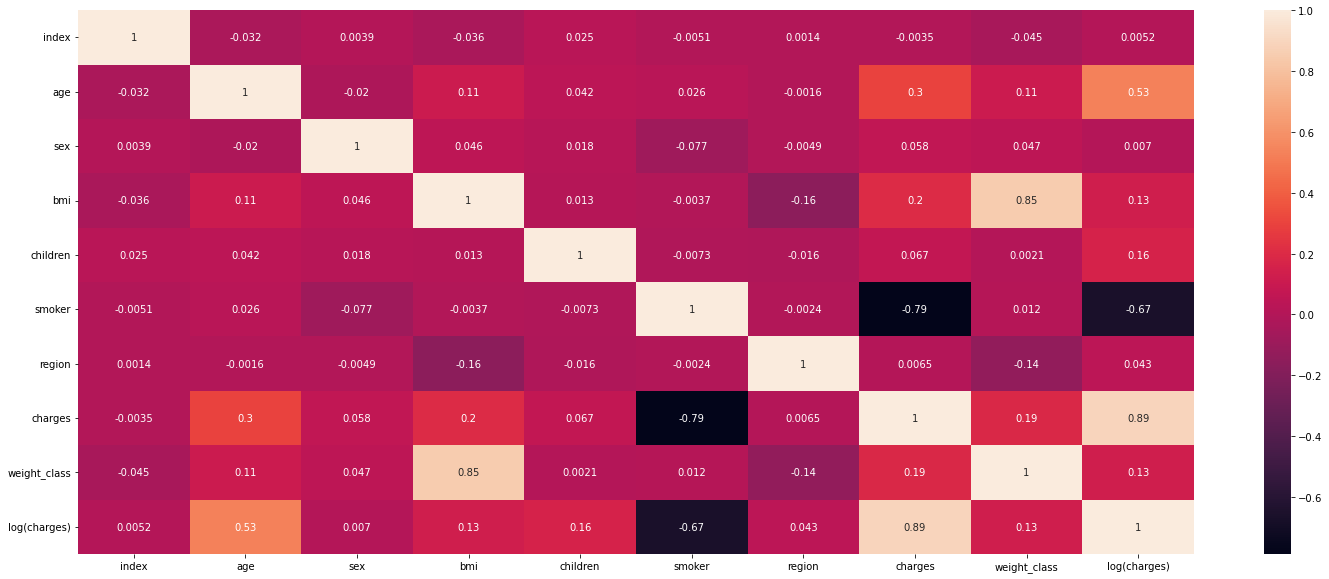

In [22]:
plt.figure(figsize = (25,10))
sns.heatmap(dfnew.corr(method = 'pearson'),annot = True);

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

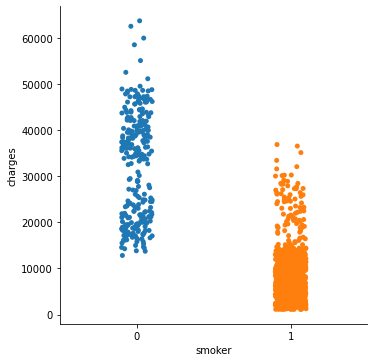

In [23]:
sns.catplot(x = dfnew['smoker'], y = dfnew['charges'], data = dfnew)

<AxesSubplot:xlabel='children', ylabel='charges'>

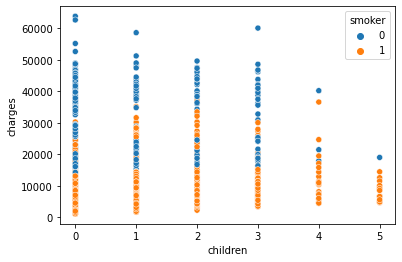

In [24]:
sns.scatterplot(x = dfnew['children'], y = dfnew['charges'], hue = 'smoker', data = dfnew)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

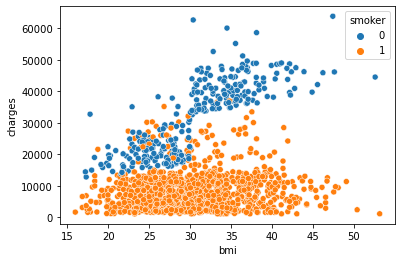

In [25]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dfnew)

In [26]:
df_non_smokers = dfnew.drop(dfnew[dfnew['smoker']==0].index)

<AxesSubplot:xlabel='children', ylabel='charges'>

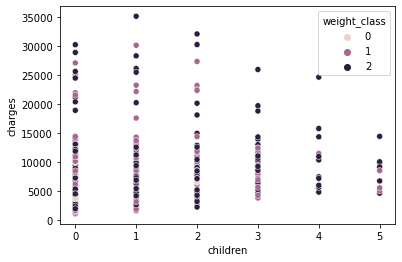

In [27]:
sns.scatterplot(x = 'children', y = 'charges', hue = 'weight_class', data = df_non_smokers.drop(df_non_smokers[df_non_smokers['weight_class']==3].index))

In [28]:
df_smokers = dfnew.drop(dfnew[dfnew['smoker']==1].index)

0.6672088652848637


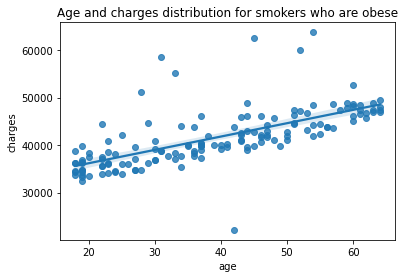

In [29]:
sns.regplot(x = 'age', y = 'charges', data = df_smokers[df_smokers['weight_class']==3])
plt.title('Age and charges distribution for smokers who are obese')
temp = df_smokers[df_smokers['weight_class']==3]
print(stats.pearsonr(temp['age'], temp['charges'])[0])

Text(0.5, 1.0, 'Age and charges distribution for smokers')

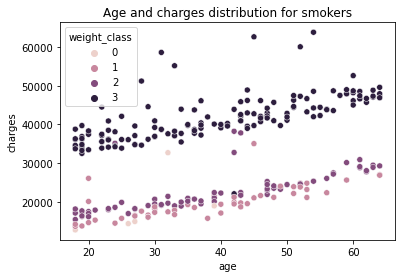

In [30]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'weight_class', data = df_smokers)
plt.title('Age and charges distribution for smokers')

<AxesSubplot:xlabel='children', ylabel='charges'>

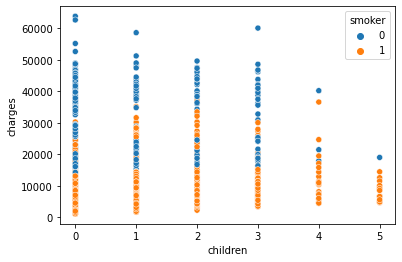

In [31]:
sns.scatterplot(x = 'children', y = 'charges', hue = 'smoker', data = dfnew)

In [32]:
#Getting the features
X = dfnew.drop(['charges', 'log(charges)'], axis =1)
#Drop our independent/target variables leaving us with only the dependent/predictor variables

#Getting the target variable
y = dfnew['log(charges)']
#our target variable is the log transformation of columns 'charges'

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
#test_size = 0.2, hence 20% of the dataset goes into test data, rest is training data

In [33]:
#Getting the features
X = dfnew.drop(['charges', 'log(charges)'], axis =1)
print("Our independent variables:")
display(X.head())

#Getting the target variable
y = dfnew['log(charges)']
print("\n The observations of our target variable:")
display(y.head())

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
print("_____________________________\n")
print("The number of rows in X_test",len(X_test))
print("The number of rows in X_train",len(X_train))
print("The number of rows in y_test",len(y_test))
print("The number of rows in y_train",len(y_train))
print("Total:", len(y))

Our independent variables:


,index,age,sex,bmi,children,smoker,region,weight_class
0,0,19,0,27.900,0,0,0,2
1,1,18,1,33.770,1,1,1,3
2,2,28,1,33.000,3,1,1,3
3,3,33,1,22.705,0,1,2,1
4,4,32,1,28.880,0,1,2,2



 The observations of our target variable:


0    4.227499
1    3.236928
2    3.648308
3    4.342116
4    3.587358
Name: log(charges), dtype: float64

_____________________________

The number of rows in X_test 268
The number of rows in X_train 1069
The number of rows in y_test 268
The number of rows in y_train 1069
Total: 1337


In [34]:
def model_performance(model,model_name,x_train = X_train,y_train = y_train,x_test = X_test,y_test = y_test):
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    mse_training = np.round(mean_squared_error(y_train,y_train_pred),3)
    mse_testing = np.round(mean_squared_error(y_test,y_test_pred),3)
    
    mae_training = np.round(mean_absolute_error(y_train,y_train_pred),3)
    mae_testing = np.round(mean_absolute_error(y_test,y_test_pred),3)
    
    r2_training = np.round(r2_score(y_train,y_train_pred),3)
    r2_testing = np.round(r2_score(y_test,y_test_pred),3)
    
    
    print("Model Performance for:",model_name)
    print("")
    
    print("Training Data Mean Squared Error:",mse_training)
    print("Testing Data Mean Squared Error:",mse_testing)
    print("")
    
    print("Training Data Mean Absolute Error:",mae_training)
    print("Testing Data Mean Absolute Error:",mae_testing)
    print("")
    
    print("Training Data r2_score:",r2_training)
    print("Testing Data r2_score:",r2_testing)
    print("----------------------------------------------------------")
    
    return mse_training,mse_testing,mae_training,mae_testing,r2_training,r2_testing

In [35]:
# Create linear regression object
lr = LinearRegression()

# Train the model using the training sets
lr.fit(X_train, y_train)

lr_performance = model_performance(lr,model_name = lr)


Model Performance for: LinearRegression()

Training Data Mean Squared Error: 0.038
Testing Data Mean Squared Error: 0.031

Training Data Mean Absolute Error: 0.124
Testing Data Mean Absolute Error: 0.118

Training Data r2_score: 0.752
Testing Data r2_score: 0.824
----------------------------------------------------------


In [36]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_performance = model_performance(dtr,model_name = dtr)

Model Performance for: DecisionTreeRegressor()

Training Data Mean Squared Error: 0.0
Testing Data Mean Squared Error: 0.046

Training Data Mean Absolute Error: 0.0
Testing Data Mean Absolute Error: 0.096

Training Data r2_score: 1.0
Testing Data r2_score: 0.737
----------------------------------------------------------


In [37]:
print(dtr.get_params())
params_dtr = {'max_depth':[5,6,7],'min_samples_leaf':[0.02,0.04,0.06]}

grid_dtr = GridSearchCV(estimator = dtr,
                       param_grid = params_dtr,
                       scoring = 'r2',
                       cv = 10,
                       n_jobs = -1)

grid_dtr.fit(X_train, y_train)


{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_leaf': [0.02, 0.04, 0.06]},
             scoring='r2')

In [38]:
best_score_dtr = grid_dtr.best_score_

print('Best hyperparameters:\n', grid_dtr.best_params_)
best_model_dtr = grid_dtr.best_estimator_
test_acc = best_model_dtr.score(X_test,y_test)
print("Test accuracy of the best model (tuned):\n {:.3f}".format(test_acc))

Best hyperparameters:
 {'max_depth': 5, 'min_samples_leaf': 0.02}
Test accuracy of the best model (tuned):
 0.882


In [39]:
grid_dtr_performance = model_performance(grid_dtr,model_name = grid_dtr)

Model Performance for: GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_leaf': [0.02, 0.04, 0.06]},
             scoring='r2')

Training Data Mean Squared Error: 0.027
Testing Data Mean Squared Error: 0.021

Training Data Mean Absolute Error: 0.091
Testing Data Mean Absolute Error: 0.084

Training Data r2_score: 0.828
Testing Data r2_score: 0.882
----------------------------------------------------------


In [46]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf_performance = model_performance(rf,model_name = rf)

Model Performance for: RandomForestRegressor()

Training Data Mean Squared Error: 0.004
Testing Data Mean Squared Error: 0.024

Training Data Mean Absolute Error: 0.034
Testing Data Mean Absolute Error: 0.084

Training Data r2_score: 0.973
Testing Data r2_score: 0.862
----------------------------------------------------------


In [47]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [48]:
params_rf = {'max_depth':[5,6,7],'n_estimators':[400,500,600]}

grid_rf = GridSearchCV(estimator = rf,
                       param_grid = params_rf,
                       scoring = 'r2',
                       cv = 10,
                       n_jobs = -1)

grid_rf.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'n_estimators': [400, 500, 600]},
             scoring='r2')

In [49]:
best_score_rf = grid_rf.best_score_

print('Best hyperparameters:\n', grid_rf.best_params_)
best_model_rf = grid_rf.best_estimator_
test_acc = best_model_rf.score(X_test,y_test)
print("Test accuracy of the best model (tuned):\n {:.3f}".format(test_acc))

Best hyperparameters:
 {'max_depth': 5, 'n_estimators': 600}
Test accuracy of the best model (tuned):
 0.880


In [50]:
grid_rf_performance = model_performance(grid_rf,model_name = grid_rf)

Model Performance for: GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'n_estimators': [400, 500, 600]},
             scoring='r2')

Training Data Mean Squared Error: 0.022
Testing Data Mean Squared Error: 0.021

Training Data Mean Absolute Error: 0.078
Testing Data Mean Absolute Error: 0.079

Training Data r2_score: 0.856
Testing Data r2_score: 0.88
----------------------------------------------------------


In [51]:
lr_performance = model_performance(lr,model_name = lr)
grid_dtr_performance = model_performance(grid_dtr,model_name = grid_dtr)
grid_rf_performance = model_performance(grid_rf,model_name = grid_rf)

Model Performance for: LinearRegression()

Training Data Mean Squared Error: 0.038
Testing Data Mean Squared Error: 0.031

Training Data Mean Absolute Error: 0.124
Testing Data Mean Absolute Error: 0.118

Training Data r2_score: 0.752
Testing Data r2_score: 0.824
----------------------------------------------------------
Model Performance for: GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_leaf': [0.02, 0.04, 0.06]},
             scoring='r2')

Training Data Mean Squared Error: 0.027
Testing Data Mean Squared Error: 0.021

Training Data Mean Absolute Error: 0.091
Testing Data Mean Absolute Error: 0.084

Training Data r2_score: 0.828
Testing Data r2_score: 0.882
----------------------------------------------------------
Model Performance for: GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'n